In [1]:
# Importing : 

import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, Multiply,GlobalAveragePooling2D, Add, Dense, Activation, Maximum, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Lambda, UpSampling2D, DepthwiseConv2D, SeparableConv2D
from keras.optimizers import Adam
from keras.initializers import glorot_uniform



In [2]:
import os
from shutil import copyfile

In [3]:
!wget "https://www.dropbox.com/s/01vda2nyojarlps/2014_BOE_Srinivasan.zip?dl=0"

--2021-04-20 16:51:26--  https://www.dropbox.com/s/01vda2nyojarlps/2014_BOE_Srinivasan.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/01vda2nyojarlps/2014_BOE_Srinivasan.zip [following]
--2021-04-20 16:51:26--  https://www.dropbox.com/s/raw/01vda2nyojarlps/2014_BOE_Srinivasan.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc853b52d7085374205fc8fcd6aa.dl.dropboxusercontent.com/cd/0/inline/BM-3E0Ho8JOANlVNzj1D1CgKtyMrdm02SuC9ZH5FnOhA9iYQl5trN9pcnHVeQkXrlW-IOvHYursq-4JkzUxIh1wQp3mNVKE0epXxqHYigkATHzJyVc4IUFBSM4T99zLBff6woZFFCIzWes63aiGQ9nip/file# [following]
--2021-04-20 16:51:27--  https://uc853b52d7085374205fc8fcd6aa.dl.dropboxusercontent.com/cd/0/inline/BM-3E0Ho8JOANlVNzj1D1CgKtyMrdm02SuC9ZH5FnOhA9iYQl5tr

In [4]:
!unzip 2014_BOE_Srinivasan.zip?dl=0

Archive:  2014_BOE_Srinivasan.zip?dl=0
   creating: Publication_Dataset/AMD1/
   creating: Publication_Dataset/AMD1/TIFFs/
   creating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/01.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/010.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/011.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/012.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/013.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/014.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/015.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/016.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/017.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/018.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/019.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/02.tif  
  inflating: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/02

In [5]:
os.listdir('Publication_Dataset')

['AMD3',
 'NORMAL10',
 'AMD9',
 'DME14',
 'NORMAL14',
 'AMD2',
 'AMD1',
 'NORMAL15',
 'NORMAL4',
 'DME15',
 'AMD4',
 'AMD7',
 'DME13',
 'DME8',
 'NORMAL5',
 'DME1',
 'NORMAL7',
 'AMD12',
 'DME9',
 'NORMAL13',
 'AMD6',
 'DME10',
 'NORMAL11',
 'DME4',
 'DME12',
 'NORMAL1',
 'AMD10',
 'AMD11',
 'DME11',
 'DME2',
 'DME5',
 'DME6',
 'NORMAL8',
 'NORMAL6',
 'NORMAL3',
 'NORMAL12',
 'AMD14',
 'DME7',
 'NORMAL2',
 'AMD15',
 'NORMAL9',
 'AMD8',
 'AMD5',
 'DME3',
 'AMD13']

In [6]:
def sri2014_process():
  
    data_dir='Publication_Dataset/'
    folder_names = os.listdir(data_dir)

    base_dir = 'data/'
    if not os.path.isdir(base_dir):
      os.mkdir(base_dir)
    p = os.path.join(base_dir,'Srinivasan2014')
    if not os.path.isdir(p):
      os.mkdir(p)
    extended_dir= os.path.join(base_dir,'Srinivasan2014')
    list_of_set = ['Train','Test']
    list_of_dir = ['AMD','DME','NORMAL']
    for setlist in list_of_set:
        more_extended = os.path.join(extended_dir,setlist)
        os.mkdir(os.path.join(extended_dir,setlist))
        for directory in list_of_dir:
            os.mkdir(os.path.join(more_extended,directory))

    t = 0
    for x in folder_names:
        y = data_dir+ x + '/TIFFs/8bitTIFFs/'
        #print (x)
        Z = os.listdir(y)
        #print(Z)
        count = 0
        for z in Z:
            oldfile = y+z
            newfile =x+ '_'+z
            #print (oldfile)
            #print (newfile)
            if count<7: # Put into Test
                if newfile[0] == 'A':
                    copyfile(oldfile,'data/Srinivasan2014/Test/AMD/'+newfile)
                elif newfile[0] == 'D':
                    copyfile(oldfile,'data/Srinivasan2014/Test/DME/'+newfile)
                else:
                    copyfile(oldfile,'data/Srinivasan2014/Test/NORMAL/'+newfile)
            else: # Put into Train
                if newfile[0] == 'A':
                    copyfile(oldfile,'data/Srinivasan2014/Train/AMD/'+newfile)
                elif newfile[0] == 'D':
                    copyfile(oldfile,'data/Srinivasan2014/Train/DME/'+newfile)
                else:
                    copyfile(oldfile,'data/Srinivasan2014/Train/NORMAL/'+newfile)
            count = count +1
        #print(z)
        t = t + len(z)

In [7]:
if __name__ == '__main__':
    sri2014_process()

In [8]:
os.listdir('data/Srinivasan2014/Train')

['NORMAL', 'DME', 'AMD']

In [10]:
train_folder = os.listdir('data/Srinivasan2014/Train')
print("Training Data")
for folder in train_folder:
  path = "data/Srinivasan2014/Train/"+folder
  print(folder+" "+str(len(os.listdir(path))))

Training Data
NORMAL 1302
DME 996
AMD 618


In [11]:
train_folder = os.listdir('data/Srinivasan2014/Test')
print("Test Data")
for folder in train_folder:
  path = "data/Srinivasan2014/Test/"+folder
  print(folder+" "+str(len(os.listdir(path))))

Test Data
NORMAL 105
DME 105
AMD 105


### Image Preprocessing

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
def srinivasan2014(batch_size,image_size,data_dir):

  train_path = data_dir+'/Train'
  test_path = data_dir+'/Test'

  classes = ['AMD','DME','NORMAL']

  train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range = 40,
    horizontal_flip = True,
    fill_mode = 'nearest'
  )

  test_datagen = ImageDataGenerator(rescale=1.0/255)

  train_generator = train_datagen.flow_from_directory(train_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size,class_mode='categorical')
  test_generator = test_datagen.flow_from_directory(test_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size, class_mode='categorical')

  return train_generator,test_generator

### Callback

In [14]:
from keras import callbacks

In [15]:
def callback_for_training(tf_log_dir_name='./log/',patience_lr=10,snapshot_name=None):
    cb = [None] * 3
    """
    Tensorboard log callback
    """
    tb = callbacks.TensorBoard(log_dir=tf_log_dir_name, histogram_freq=0)
    cb[0]= tb
   
    """
    Model Checkpointer
    """
    if snapshot_name != None:
        checkpointer = callbacks.ModelCheckpoint(filepath="optic-net.{epoch:02d}-{val_accuracy:.2f}.hdf5",
                                verbose=0,
                                monitor='val_accuracy')
    else :
        checkpointer = callbacks.ModelCheckpoint(filepath=snapshot_name+".{epoch:02d}-{val_accuracy:.2f}.hdf5",
                                verbose=0,
                                monitor='val_accuracy')
    cb[1] = checkpointer
    
    """
    Reduce Learning Rate
    """
    reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=6, verbose=1, min_lr=1e-8, mode='auto')
    cb[2] = reduce_lr_loss
    
    return cb

# OpticNet-71

In [16]:
def res_conv(X,filters,base,s):

   name_base = base + '/branch'
    
   F1, F2, F3 = filters

   ## Branch 1 is the main path and Branch 2 is the shortcut path ##

   X_shortcut = X

   ## Branch 1 ##
   # First component of Branch1 
   X = BatchNormalization(axis=-1, name=name_base + '1/bn_1')(X)
   X= Activation('relu', name=name_base + '1/relu_1')(X)
   X = Conv2D(filters=F1, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '1/conv_1', kernel_initializer=glorot_uniform(seed=0))(X)
 
   # Second component of Branch2
   X = BatchNormalization(axis=-1, name=name_base + '1/bn_2')(X)
   X= Activation('relu', name=name_base + '1/relu_2')(X)
   X = Conv2D(filters=F2, kernel_size=(2,2), strides=(s,s), padding='same', name=name_base + '1/conv_2', kernel_initializer=glorot_uniform(seed=0))(X)

   # Third component of Branch1 
   X = BatchNormalization(axis=-1, name=name_base + '1/bn_3')(X)
   X= Activation('relu', name=name_base + '1/relu_3')(X)
   X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '1/conv_3', kernel_initializer=glorot_uniform(seed=0))(X)

   # Branch2 
   X_shortcut = BatchNormalization(axis=-1, name=name_base + '2/bn_1')(X_shortcut)
   X_shortcut = Activation('relu', name=name_base + '2/relu_1')(X_shortcut)
   X_shortcut = Conv2D(filters=F3, kernel_size=(1,1), strides=(s,s), padding='valid', name=name_base + '2/conv_1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)

   # Final step: Add Branch1 and Branch2
   X = Add(name=base + '/Add')([X, X_shortcut])

   return X

In [18]:
def res_identity(X,filters,base):

  name_base = base + '/branch'
    
  F1, F2, F3 = filters

  ##### Branch 1 is the main path and Branch 2 is the shortcut path #####
    
  X_shortcut = X
    
  ##### Branch1 #####
  # First component of Branch1 
  X = BatchNormalization(axis=-1, name=name_base + '1/bn_1')(X)
  Shortcut= Activation('relu', name=name_base + '1/relu_1')(X)
  X = Conv2D(filters=F1, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '1/conv_1', kernel_initializer=glorot_uniform(seed=0))(Shortcut)

  # Second component BranchOut 1
  X1 = BatchNormalization(axis=-1, name=name_base + '1/ConvBn_2')(X)
  X1 = Activation('relu', name=name_base + '1/ConvRelu_2')(X1)
  X1 = Conv2D(filters=F2, kernel_size=(2,2), dilation_rate=(2, 2),strides=(1,1), padding='same', name=name_base + '1/Conv_2', kernel_initializer=glorot_uniform(seed=0))(X1)
    
  # Second component BrancOut 2
  X2 = BatchNormalization(axis=-1, name=name_base + '1/SepBn_2')(X)
  X2 = Activation('relu', name=name_base + '1/SepRelu_2')(X2)
  X2 = SeparableConv2D(filters=F2, kernel_size=(2,2), dilation_rate=(2, 2),strides=(1,1), padding='same', name=name_base + '1/SepConv_2', kernel_initializer=glorot_uniform(seed=0))(X2)
    
  # Second component Add-BranchOut
  X = Add(name=base + '/Add-2branches')([X1, X2])
    
  # Third component of Branch1
  X = BatchNormalization(axis=-1, name=name_base + '1/bn_3')(X)
  X = Activation('relu', name=name_base + '1/relu_3')(X)
  X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '1/conv_3', kernel_initializer=glorot_uniform(seed=0))(X)    
    
  # Final step: Add Branch1 and the original Input itself
  X = Add(name=base + '/Add')([X_shortcut,X])

  return X


In [19]:
def EncoderDecoder(X, name_base):

  X = MaxPooling2D((3,3), strides=(2,2), padding='same', name = name_base + '/Downsample1')(X)
  X = UpSampling2D(size=(2, 2),interpolation='bilinear',name = name_base + '/Upsample1')(X)
  X = Activation('sigmoid', name = name_base + '/Activate')(X)
  
  return X

In [20]:
def RDBI(X, filters, base, number):
    
    for i in range(number):
        X = res_identity(X, filters, base+ '/id_'+str(1+i))
    
    return X

In [21]:
def OpticNet(input_size,num_of_classes):

  input_shape=(input_size, input_size, 3) # Height x Width x Channel
  X_input = Input(input_shape)

  X = Conv2D(64, (7,7), strides=(2,2), padding='same', name ='CONV1', kernel_initializer=glorot_uniform(seed=0))(X_input)
  X = BatchNormalization(axis=-1, name ='BN1')(X)
  X = Activation('relu', name ='RELU1')(X)   
  X = res_conv(X, [64,64,256], 'RC0', 1)
    
  # MID 1
  X1 = EncoderDecoder(X, 'EncoderDecoder1')    
  X2 = RDBI(X, [32,32,256], 'RDBI1',4)    
  X = Multiply(name = 'Mutiply1')([X1,X2])    
  X = Add(name = 'Add1')([X,X1,X2])    
  X = res_conv(X, [128,128,512], 'RC1', 2)
    
  # MID 2    
  X1 = EncoderDecoder(X, 'EncoderDecoder2')  
  X2 = RDBI(X, [64,64,512], 'RDBI2',4)   
  X = Multiply(name = 'Mutiply2')([X1,X2])   
  X = Add(name = 'Add2')([X,X1,X2])    
  X = res_conv(X, [256,256,1024], 'RC2', 2)
    
  # MID 3 
  X1 = EncoderDecoder(X, 'EncoderDecoder3')  
  X2 = RDBI(X, [128,128,1024], 'RDBI3',3)  
  X = Multiply(name = 'Mutiply3')([X1,X2])   
  X = Add(name = 'Add3')([X,X1,X2])    
  X = res_conv(X, [512,512,2048], 'RC3', 2)
    
  # MID 4    
  X1 = EncoderDecoder(X, 'EncoderDecoder4')    
  X2 = RDBI(X, [256,256,2048], 'RDBI4',3)    
  X = Multiply(name = 'Mutiply4')([X1,X2])    
  X = Add(name = 'Add4')([X,X1,X2])
    
    
  X = GlobalAveragePooling2D(name='global_avg_pool')(X)
  X = Dense(256, name='Dense_1')(X)
  X = Dense(num_of_classes, name='Dense_2')(X)
  X = Activation('softmax', name='classifier')(X)
    
    
  model = Model(inputs=X_input, outputs=X, name='')
  model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])    
  model.summary()
    
  return model

### Plotting

In [22]:
import matplotlib.pyplot as plt

In [23]:
def  plot_loss_acc(history,snapshot_name=None):
  
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo')
    plt.plot(epochs, val_loss, 'g')
    plt.title('Training and validation loss')
    plt.legend(['train', 'val'], loc='upper right')
    if snapshot_name == None:
        filename= 'OpticNet_loss.png'
    else:
        filename= snapshot_name+'_loss.png'
    plt.savefig(filename)
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'g')
    plt.title('Training and validation accuracy')
    plt.legend(['train', 'val'], loc='lower right')
    if snapshot_name == None:
        filename= 'OpticNet_acc.png'
    else:
        filename= snapshot_name+'_acc.png'
    plt.savefig(filename)
    plt.show() 

# Training

In [24]:
import time
import keras.backend as K
import gc

In [25]:
def train(data_dir, logdir, input_size, dataset, batch_size, epoch,snapshot_name):
    
    train_batches, test_batches = srinivasan2014(batch_size, input_size, data_dir)
    num_of_classes = 3
    train_size = 2916
    test_size = 315
    
    # Clear any outstanding net or memory    
    K.clear_session()
    gc.collect()

    # Calculating the starting time
    
    start_time = time.time()

    # Callbacks for model saving, adaptive learning rate
    cb = callback_for_training(tf_log_dir_name=logdir,snapshot_name=snapshot_name)


    # Loading the model
    model = OpticNet(input_size,num_of_classes)

    # Training the model
    history = model.fit_generator(train_batches, shuffle=True, steps_per_epoch=train_size //batch_size, validation_data=test_batches, validation_steps= test_size//batch_size, epochs=epoch, verbose=1, callbacks=cb)


    end_time = time.time()

    print("--- Time taken to train : %s hours ---" % ((end_time - start_time)//3600))

    # Saving the final model
    if snapshot_name == None :
        model.save('OpticNet.h5')
       
    else :    
        model.save(snapshot_name+'.h5')
    
    plot_loss_acc(history,snapshot_name)

Found 2916 images belonging to 3 classes.
Found 315 images belonging to 3 classes.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
CONV1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
BN1 (BatchNormalization)        (None, 112, 112, 64) 256         CONV1[0][0]                      
__________________________________________________________________________________________________
RELU1 (Activation)              (None, 112, 112, 64) 0           BN1[0][0]                        
___________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
729/729 [==============================] - 222s 247ms/step - loss: 2.2315 - accuracy: 0.4807 - val_loss: 0.7802 - val_accuracy: 0.5865
Epoch 2/5
729/729 [==============================] - 183s 251ms/step - loss: 0.9435 - accuracy: 0.6074 - val_loss: 0.7079 - val_accuracy: 0.6987
Epoch 3/5
729/729 [==============================] - 183s 251ms/step - loss: 0.7047 - accuracy: 0.6862 - val_loss: 1.9023 - val_accuracy: 0.5096
Epoch 4/5
729/729 [==============================] - 183s 251ms/step - loss: 0.5649 - accuracy: 0.7634 - val_loss: 1.4156 - val_accuracy: 0.6923
Epoch 5/5
729/729 [==============================] - 183s 251ms/step - loss: 0.4626 - accuracy: 0.8158 - val_loss: 0.4768 - val_accuracy: 0.8237
--- Time taken to train : 0.0 hours ---


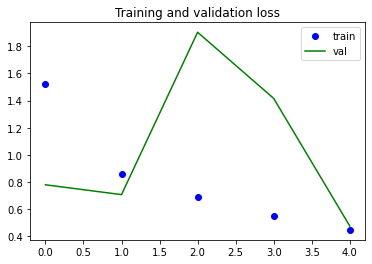

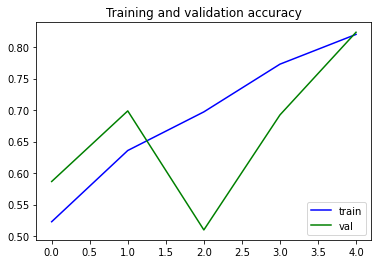

In [26]:
train(data_dir='data/Srinivasan2014',logdir='optic-net-sri2014-log',input_size=224,dataset='Srinivasan2014',batch_size=4,epoch=5,snapshot_name='optic-net-sri2014')

### For accuracy calculation

In [27]:
pip install pycm

     |████████████████████████████████| 71kB 5.3MB/s 
     |████████████████████████████████| 573kB 10.4MB/s 


In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pycm

In [29]:
def print_metric(y_true,y_pred):

    cz = pycm.ConfusionMatrix(actual_vector=y_true.argmax(axis=1), predict_vector=y_pred.argmax(axis=1))
    
    # Accuracy
    acc = cz.Overall_ACC
    print("Average Accuracy : "+str(acc*100)+'%')

# Testing

In [36]:
def test(datadir,model):

    test_datagen = ImageDataGenerator(rescale=1.0/255)
    image_size = 224

    classes=['AMD', 'DME','NORMAL']
    batch = 315
    train_batches,test_batches = srinivasan2014(data_dir=datadir,image_size=image_size,batch_size=batch)

    imgs, y_true = next(test_batches)

    K.clear_session()


    start= time.time()
    y_pred = model.predict(imgs)
    end = time.time()

    print ((end-start)/1000)

    print_metric(y_true,y_pred)
  


In [33]:
from keras.models import load_model

In [34]:
model = load_model('optic-net.05-0.82.hdf5')

In [37]:
test(datadir='data/Srinivasan2014',model=model)

Found 2916 images belonging to 3 classes.
Found 315 images belonging to 3 classes.
0.004621599674224854
Average Accuracy : 82.53968253968253%
